# Data Science with Python - Awesome Tutorials and Fuel Efficiency Prediction with Regression using The Auto MPG dataset

    This kernel contains Prediction of Fuel Efficiency - Regression using The Auto MPG dataset and a curated list of Python tutorials for Data Science, NLP and Machine Learning.

> #### **Credits**: Thanks to **TensorFlow Team**, **Ujjwal Karn** and other contributers for such wonderful curated collections!

### Here are some of *my kernel notebooks* for **Machine Learning and Data Science** as follows, ***Upvote*** them if you *like* them

> * [Awesome Deep Learning Basics and Resources](https://www.kaggle.com/arunkumarramanan/awesome-deep-learning-resources)
> * [Data Science with R - Awesome Tutorials](https://www.kaggle.com/arunkumarramanan/data-science-with-r-awesome-tutorials)
> * [Data Science and Machine Learning Cheetcheets](https://www.kaggle.com/arunkumarramanan/data-science-and-machine-learning-cheatsheets)
> * [Awesome ML Frameworks and MNIST Classification](https://www.kaggle.com/arunkumarramanan/awesome-machine-learning-ml-frameworks)
> * [Awesome Data Science for Beginners with Titanic Exploration](https://kaggle.com/arunkumarramanan/awesome-data-science-for-beginners)
> * [Tensorflow Tutorial and House Price Prediction](https://www.kaggle.com/arunkumarramanan/tensorflow-tutorial-and-examples)
> * [Practical Machine Learning with PyTorch](https://www.kaggle.com/arunkumarramanan/practical-machine-learning-with-pytorch)
> * [Data Scientist's Toolkits - Awesome Data Science Resources](https://www.kaggle.com/arunkumarramanan/data-scientist-s-toolkits-awesome-ds-resources)
> * [Awesome Computer Vision Resources (TBU)](https://www.kaggle.com/arunkumarramanan/awesome-computer-vision-resources-to-be-updated)
> * [Machine Learning Engineer's Toolkit with Roadmap](https://www.kaggle.com/arunkumarramanan/machine-learning-engineer-s-toolkit-with-roadmap) 
> * [Awesome TensorFlow and PyTorch Resources](https://www.kaggle.com/arunkumarramanan/awesome-tensorflow-and-pytorch-resources)
> * [Hands-on ML with scikit-learn and TensorFlow](https://www.kaggle.com/arunkumarramanan/hands-on-ml-with-scikit-learn-and-tensorflow)
> * [Awesome Data Science IPython Notebooks](https://www.kaggle.com/arunkumarramanan/awesome-data-science-ipython-notebooks)
> * [Machine Learning and Deep Learning - Awesome Tutorials](https://www.kaggle.com/arunkumarramanan/awesome-deep-learning-ml-tutorials)
> * [Data Science with Python - Awesome Tutorials](https://www.kaggle.com/arunkumarramanan/data-science-with-python-awesome-tutorials)

# Fuel Efficiency Prediction - Regression using The Auto MPG dataset

In a *regression* problem, we aim to predict the output of a continuous value, like a price or a probability. Contrast this with a *classification* problem, where we aim to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This notebook uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) Dataset and builds a model to predict the fuel efficiency of late-1970s and early 1980s automobiles. To do this, we'll provide the model with a description of many automobiles from that time period. This description includes attributes like: cylinders, displacement, horsepower, and weight.

This example uses the `tf.keras` API, see [this guide](https://www.tensorflow.org/guide/keras) for details.

In [1]:
# Use seaborn for pairplot
!pip install seaborn

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.12.0


## The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).



### Get the data
First download the dataset.

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 4us/step


'/tmp/.keras/datasets/auto-mpg.data'

Import it using pandas

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### Clean the data

The dataset contains a few unknown values. 

In [5]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

To keep this initial tutorial simple drop those rows. 

In [6]:
dataset = dataset.dropna()

The `"Origin"` column is really categorical, not numeric. So convert that to a one-hot:

In [7]:
origin = dataset.pop('Origin')

In [8]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


### Split the data into train and test

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [9]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


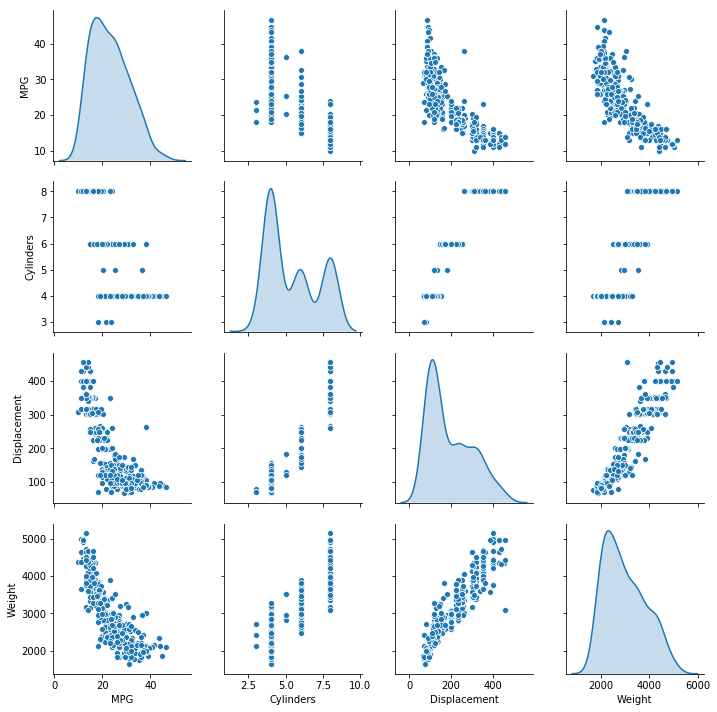

In [10]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

Also look at the overall statistics:

In [11]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [12]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### Normalize the data

Look again at the `train_stats` block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input. 

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [13]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.  That includes the test set as well as live data when the model is used in production.

## The model

### Build the model

Let's build our model. Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [14]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [15]:
model = build_model()

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________



Now try out the model. Take a batch of `10` examples from the training data and call `model.predict` on it.

In [17]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.12670723],
       [-0.03443428],
       [ 0.3062502 ],
       [ 0.3065169 ],
       [ 0.36841604],
       [ 0.02191051],
       [ 0.3674207 ],
       [ 0.10561748],
       [ 0.00638346],
       [-0.00226454]], dtype=float32)

It seems to be working, and it produces a result of the expected shape and type.

### Train the model

Train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [18]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualize the model's training progress using the stats stored in the `history` object.

In [19]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,8.969163,2.363666,8.969163,2.447986,0.999695,2.447986,995
996,8.801920,2.325327,8.801920,2.558123,1.016450,2.558123,996
997,8.814242,2.317156,8.814242,2.315611,0.999247,2.315611,997
998,8.445328,2.270796,8.445328,2.501316,1.058569,2.501316,998
999,8.631644,2.305249,8.631644,2.599803,1.068485,2.599803,999


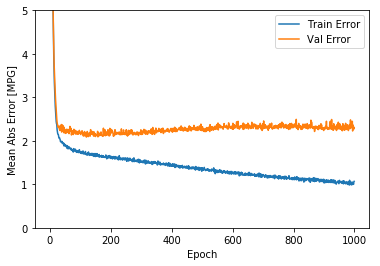

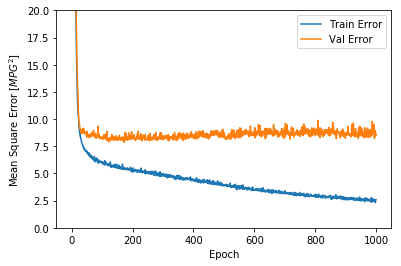

In [20]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve. We'll use an *EarlyStopping callback* that tests a training condition for  every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

You can learn more about this callback [here](https://www.tensorflow.org/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping).


....................................................................................................
..

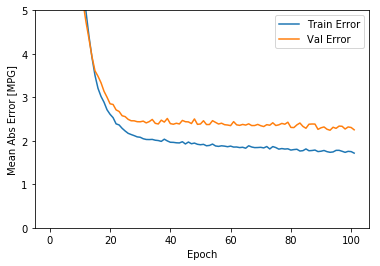

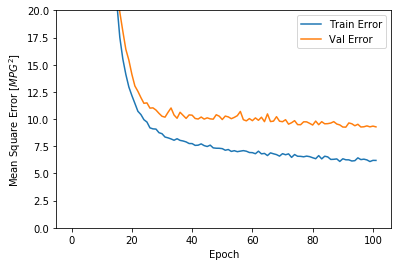

In [21]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

The graph shows that on the validation set, the average error is usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.  This tells us how well we can expect the model to predict when we use it in the real world.

In [22]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.97 MPG


### Make predictions

Finally, predict MPG values using data in the testing set:

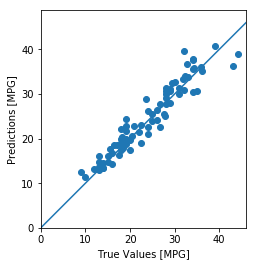

In [23]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

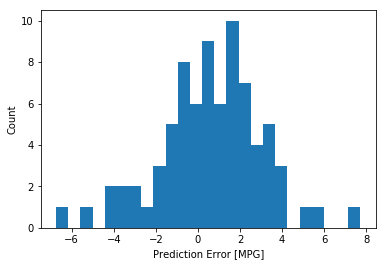

In [24]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

It's not quite gaussian, but we might expect that because the number of samples is very small.

## Conclusion

This notebook introduced a few techniques to handle a regression problem.

* Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
* Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
* Early stopping is a useful technique to prevent overfitting.

## License

##### Copyright 2018 The TensorFlow Authors.

In [25]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [26]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Awesome Tutorials for Data Science with Python (TBU)
    Common Data analysis and Machine learning tasks using Python

## The Python Language
- [Python 3 in one picture](https://fossbytes.com/wp-content/uploads/2015/09/python-3-in-one-pic.png)
- [**Awesome Python**](https://github.com/vinta/awesome-python)
- [**Jargon from the functional programming world in simple terms!**](https://github.com/hemanth/functional-programming-jargon)
- [**Dive Into Python**](http://www.diveintopython.net/index.html)
- [Learn Python Wiki on Reddit](https://www.reddit.com/r/learnpython/wiki/index)
- [Learn 90% of Python in 90 Minutes](https://www.slideshare.net/MattHarrison4/learn-90)
- [Highest Voted Python Questions](http://stackoverflow.com/questions/tagged/python?sort=votes&pageSize=50)
- [Python Basic Concepts](https://github.com/gumption/Python_for_Data_Science/blob/master/3_Python_Basic_Concepts.ipynb)
- [Quick Reference to Python](http://www.dataschool.io/python-quick-reference/)
- [The Elements of Python Style](https://github.com/amontalenti/elements-of-python-style)
- [**What does the yield keyword do in Python?**](http://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do-in-python)
- [Parsing values from a JSON file in Python](http://stackoverflow.com/questions/2835559/parsing-values-from-a-json-file-in-python)
- [**Python Quora FAQs**](https://www.quora.com/topic/Python-programming-language-1)
- [time-complexity of various operations - list/dict - in current CPython](https://wiki.python.org/moin/TimeComplexity)
- Scripting in Python
    - [Python Scripting Tutorial](http://www.dreamsyssoft.com/python-scripting-tutorial/intro-tutorial.php)
    - [Scripting with Python](https://www.schrodinger.com//AcrobatFile.php?type=supportdocs&type2=&ident=404)
    - [**Can I use Python as a bash replacement?**](http://stackoverflow.com/questions/209470/can-i-use-python-as-a-bash-replacement)

## Useful Online Courses
- [Learn Python (Codecademy)](https://www.codecademy.com/learn/python#)
- [Free Interactive Course: Intro to Python for Data Science (DataCamp)](https://www.datacamp.com/courses/intro-to-python-for-data-science)
- [Introduction to Computer Science and Programming Using Python (MIT)](https://www.edx.org/course/introduction-computer-science-mitx-6-00-1x-11)
- [Python for Everybody](https://www.coursera.org/learn/python)
- [Python Programming Essentials](https://www.coursera.org/learn/python-programming)

## Data Science with Python
- [**Data Science IPython Notebooks**](https://github.com/donnemartin/data-science-ipython-notebooks)
- [Awesome Python - Data Analysis](https://github.com/vinta/awesome-python#science-and-data-analysis)
- Statistics
  - [Statistics and Data Science](https://github.com/svaksha/pythonidae/blob/master/Statistics.md)
- [**An Introduction to Scientific Python (and a Bit of the Maths Behind It) – NumPy**](http://www.kdnuggets.com/2016/06/intro-scientific-python-numpy.html)
- [Data Analysis and IPython Notebooks](https://github.com/kirang89/pycrumbs#data-analysis)
- [Python for Data Science: Basic Concepts](https://github.com/gumption/Python_for_Data_Science/blob/master/2_Data_Science_Basic_Concepts.ipynb)
- [Pycon India 2015 Notes](http://www.analyticsvidhya.com/blog/2015/10/notes-impressions-experience-excitement-pycon-india-2015/)
- [**5 important Python Data Science advancements of 2015**](https://medium.com/@elgehelge/the-5-most-important-python-data-science-advancements-of-2015-a136482da89b#.sp2c1la9z)
- [Data Exploration with Numpy cheat sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python)
- [Querying Craiglist with Python](http://chrisholdgraf.com/querying-craigslist-with-python/?imm_mid=0d8940&cmp=em-data-na-na-newsltr_20150916)
- [**An introduction to Numpy and Scipy**](http://www.engr.ucsb.edu/~shell/che210d/numpy.pdf)
- [Create NBA Shot Charts](http://savvastjortjoglou.com/nba-shot-sharts.html)
- [PythoR- Python meets R](http://nipunbatra.github.io/2016/01/pythor/)
- [**How do I learn data analysis with Python?**](https://www.quora.com/How-do-I-learn-data-analysis-with-Python?redirected_qid=2464720)
- [What are some interesting things to do with Python?](https://www.quora.com/Python-programming-language-What-are-some-interesting-things-to-do-with-Python?redirected_qid=2324227)
- [**Which is better for data analysis: R or Python?**](https://www.quora.com/Which-is-better-for-data-analysis-R-or-Python)
- [**Web scraping in Python**](https://github.com/ujjwalkarn/Web-Scraping)
- [The Guide to Learning Python for Data Science](http://www.datasciencecentral.com/profiles/blogs/the-guide-to-learning-python-for-data-science-2)
- [Python For Data Science - A Cheat Sheet For Beginners](https://www.datacamp.com/community/tutorials/python-data-science-cheat-sheet-basics)
- [Top voted Python data science questions](http://datascience.stackexchange.com/questions/tagged/python)
- [Awesome Python - Data Visualization](https://github.com/vinta/awesome-python#data-visualization)
- [Awesome Python - Map Reduce](https://github.com/vinta/awesome-python#mapreduce)

## Pandas Library in Python
- [Intro to pandas data structures](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/)
- [Useful Pandas Cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [An Introduction to Scientific Python – Pandas](http://www.datadependence.com/2016/05/scientific-python-pandas/)
- [10 minutes to Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [Useful Pandas Snippets](http://www.swegler.com/becky/blog/2014/08/06/useful-pandas-snippets/)
- [Timeseries analysis using Pandas](http://nbviewer.jupyter.org/github/twiecki/financial-analysis-python-tutorial/blob/master/1.%20Pandas%20Basics.ipynb)
- [Pandas Exercises - Practice your Pandas skills](https://github.com/guipsamora/pandas_exercises)
- [Grouping in Pandas](http://blog.yhat.com/posts/grouping-pandas.html)
- [**“Large data” work flows using pandas**](http://stackoverflow.com/questions/14262433/large-data-work-flows-using-pandas)
- [Easier data analysis with pandas (video series)](http://www.dataschool.io/easier-data-analysis-with-pandas/)
- [Pandas Basics Cheat Sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet)
- Quick Operations on a Pandas DataFrame
    - [Renaming Columns in Pandas](http://stackoverflow.com/questions/11346283/renaming-columns-in-pandas) ([video](https://www.youtube.com/watch?v=0uBirYFhizE&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=5))
    - [Deleting Columns from pandas DataFrame](http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe) ([video](https://www.youtube.com/watch?v=gnUKkS964WQ&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=6))
    - [Adding new Column to existing DataFrame](http://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas)
    - [Add one Row in a pandas.DataFrame](http://stackoverflow.com/questions/10715965/add-one-row-in-a-pandas-dataframe)
    - [Changing the order of DataFrame Columns](http://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns)
    - [Changing data type of Columns](http://stackoverflow.com/questions/15891038/pandas-change-data-type-of-columns) ([video](https://www.youtube.com/watch?v=V0AWyzVMf54&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=13))
    - [Getting a list of the column headers from a DataFrame](http://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers)
    - [Converting list of dictionaries to Dataframe](http://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-dataframe)
    - [Getting row count of pandas DataFrame](http://stackoverflow.com/questions/15943769/how-to-get-row-count-of-pandas-dataframe)
    - [Most efficient way to loop through DataFrames](http://stackoverflow.com/questions/7837722/what-is-the-most-efficient-way-to-loop-through-dataframes-with-pandas)
    - [Deleting DataFrame row based on column value](http://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value)
    - [Dropping a list of rows from Pandas DataFrame](http://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe)
    - [Sorting a DataFrame or a single column](https://www.youtube.com/watch?v=zY4doF6xSxY&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=7)
    - [Filtering DataFrame rows by column value](https://www.youtube.com/watch?v=2AFGPdNn4FM&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=8)
    - [Filtering DataFrame rows using multiple criteria](https://www.youtube.com/watch?v=YPItfQ87qjM&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=9)
    - [Dropping all non-numeric columns from a DataFrame](https://youtu.be/B-r9VuK80dk?t=4m31s)
    - [Counting and removing missing values](https://www.youtube.com/watch?v=fCMrO_VzeL8&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=16)
    - [Selecting multiple rows and columns from a DataFrame](https://www.youtube.com/watch?v=xvpNA7bC8cs&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=19)
    - [Reducing the size of a DataFrame](https://www.youtube.com/watch?v=wDYDYGyN_cw&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=21)

## Machine Learning with Python
- [AI, ML Related List](https://github.com/svaksha/pythonidae/blob/master/AI.md)
- [Data Normalization in Python](http://blog.yhat.com/posts/data-normalization-in-python.html)
- [**Python Machine Learning Book**](https://github.com/rasbt/python-machine-learning-book)
- [Table of Contents and Code Notebooks](https://github.com/rasbt/python-machine-learning-book/blob/master/README.md#table-of-contents-and-code-notebooks)
- [Machine Learning with scikit learn](http://www.dataschool.io/machine-learning-with-scikit-learn/)
- [Machine Learning Algorithms Cheatsheet](http://www.analyticsvidhya.com/blog/2015/09/full-cheatsheet-machine-learning-algorithms/)
- [**How to compute precision, recall, accuracy and f1-score for the multiclass case with scikit learn?**](http://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case)
- [One Hot Encoding for Machine learning in Python](http://stackoverflow.com/questions/17469835/one-hot-encoding-for-machine-learning)
- [**Building a (semi) Autonomous Drone with Python**](http://blog.yhat.com/posts/autonomous-droning-with-python.html)
- [Awesome Python - Machine Learning](https://github.com/vinta/awesome-python#machine-learning)
- Computer Vision
  - [Awesome Python - Computer Vision](https://github.com/vinta/awesome-python#computer-vision)

## Scikit Learn
- [scikit learn on Wikipedia](https://en.wikipedia.org/wiki/Scikit-learn)
- [**Introduction to machine learning with scikit-learn**](https://github.com/justmarkham/scikit-learn-videos), [**Videos!**](http://blog.kaggle.com/author/kevin-markham/)
- [**A Gentle Introduction to Scikit-Learn: A Python Machine Learning Library**](http://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/)
- [**PyData Seattle 2015 Scikit-learn Tutorial**](https://github.com/jakevdp/sklearn_pydata2015), [sklearn_scipy2013](https://github.com/jakevdp/sklearn_scipy2013)
- [SKLEARN BENCHMARKS: A centralized repository to report scikit-learn model performance across a variety of parameter settings and data sets](https://github.com/rhiever/sklearn-benchmarks), [Report results of sklearn benchmarks at openml.org](http://www.openml.org/)
- [How to get most informative features for scikit-learn classifiers?](http://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers)
- [**Code example to predict prices of Airbnb vacation rentals, using scikit-learn on Spark**](https://github.com/mapr-demos/spark-sklearn-airbnb-predict)
- [**Machine Learning with scikit learn tutorial**](http://amueller.github.io/sklearn_tutorial/)
- [Parallel and Large Scale Machine Learning with scikit-learn](https://speakerdeck.com/ogrisel/parallel-and-large-scale-machine-learning-with-scikit-learn), [Meetup](http://datasciencelondon.org/machine-learning-python-scikit-learn-ipython-dsldn-data-science-london-kaggle/)
- [Saving classifier to disk in scikit-learn](http://stackoverflow.com/questions/10592605/save-classifier-to-disk-in-scikit-learn)


## Linear Regression in Python
- [Linear Regression in Python](http://nbviewer.ipython.org/github/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb), [Blog Post](http://www.dataschool.io/linear-regression-in-python/)
- [Linear Regression using Scikit Learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [A friendly introduction to linear regression (using Python)](http://www.dataschool.io/linear-regression-in-python/)
- [Linear Regression Example in Python](http://scipy-cookbook.readthedocs.io/items/LinearRegression.html)
- [Regression analysis using Python StatsModels package](http://www.turingfinance.com/regression-analysis-using-python-statsmodels-and-quandl/)
- [Run an OLS regression with Pandas Data Frame](http://stackoverflow.com/questions/19991445/run-an-ols-regression-with-pandas-data-frame)

## Logistic Regression in Python
- [Logistic Regression with scikit learn](http://www.dataschool.io/logistic-regression-in-python-using-scikit-learn/)
- [Logistic Regression in Python](http://blog.yhat.com/posts/logistic-regression-and-python.html)
- [Implementing the softmax function in Python](http://stackoverflow.com/questions/34968722/softmax-function-python)
- [**What is the inverse of regularization strength in Logistic Regression? How should it affect my code?**](http://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul)
- [The Yhat Blog: Logistic Regression in Python](http://blog.yhat.com/posts/logistic-regression-and-python.html)
- [Example of logistic regression in Python using scikit-learn](http://www.dataschool.io/logistic-regression-in-python-using-scikit-learn/)
- [TUTORIAL ON LOGISTIC REGRESSION AND OPTIMIZATION IN PYTHON](https://learningwithdata.wordpress.com/2015/04/30/tutorial-on-logistic-regression-and-optimization-in-python/)
- [Using Logistic Regression in Python for Data Science](http://www.dummies.com/how-to/content/using-logistic-regression-in-python-for-data-scien.html)

## k Nearest Neighbours in Python
- [A good tutorial on implementing K Nearest Neighbors using scikit learn](http://scikit-learn.org/stable/modules/neighbors.html)
- [**Is it possible to specify your own distance function using scikit-learn K-Means Clustering?**](http://stackoverflow.com/questions/5529625/is-it-possible-to-specify-your-own-distance-function-using-scikit-learn-k-means)
- [Tutorial To Implement k-Nearest Neighbors in Python From Scratch](http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)
- [Implementing your own k-nearest neighbour algorithm using Python](https://blog.cambridgecoding.com/2016/01/16/machine-learning-under-the-hood-writing-your-own-k-nearest-neighbour-algorithm/)
- [knn Python implementation on StackOverflow](http://stackoverflow.com/questions/5565935/k-nearest-neighbour-in-python)
- [kNN with big sparse matrices in Python](http://stackoverflow.com/questions/20333092/knn-with-big-sparse-matrices-in-python)
- [Sklearn kNN usage with a user defined metric](http://stackoverflow.com/questions/21052509/sklearn-knn-usage-with-a-user-defined-metric)


## Neural Networks in Python
- [Implementing a Neural Network from scratch in Python](http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/), [Code](https://github.com/dennybritz/nn-from-scratch)
- [A Neural Network in 11 lines of Python](http://iamtrask.github.io/2015/07/12/basic-python-network/)
- [Speeding up your Neural Network with Theano and the gpu](http://www.wildml.com/2015/09/speeding-up-your-neural-network-with-theano-and-the-gpu/), [Code](https://github.com/dennybritz/nn-theano)
- [What is the best neural network library for Python?](https://www.quora.com/What-is-the-best-neural-network-library-for-Python)
- [Recurrent Neural Net Tutorial in Python Part 1](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/), [Part 2](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-2-implementing-a-language-model-rnn-with-python-numpy-and-theano/), [Code](https://github.com/dennybritz/rnn-tutorial-rnnlm/)
- [PyBrain: modular Machine Learning Library for Python](http://pybrain.org/)
- [Neural Networks Tutorial – a Pathway to Deep Learning](http://www.adventuresinmachinelearning.com/neural-networks-tutorial/)


## Decision Trees in Python
- [How to extract the decision rules from scikit-learn decision-tree?](http://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree)
- [**How do I find which attributes my tree splits on, when using scikit-learn?**](http://stackoverflow.com/questions/20156951/how-do-i-find-which-attributes-my-tree-splits-on-when-using-scikit-learn)
- [Quora: What is a good Python library for decision trees?](https://www.quora.com/What-is-a-good-Python-library-for-decision-trees), [StackOverflow](http://stackoverflow.com/questions/3127922/what-is-a-good-python-library-for-decision-trees) 
- [Building Decision Trees in Python](http://www.onlamp.com/pub/a/python/2006/02/09/ai_decision_trees.html?page=1)
- [Pure Python Decision Trees](http://kldavenport.com/pure-python-decision-trees/)
- [Building a decision tree from scratch in Python - a beginner's tutorial](http://www.patricklamle.com/Tutorials/Decision%20tree%20python/tuto_decision%20tree.html)
- [Using Python to Build and Use a Simple Decision Tree Classifier](https://github.com/gumption/Python_for_Data_Science/blob/master/4_Python_Simple_Decision_Tree.ipynb)
- [Decision trees in python with scikit-learn and pandas](http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html)
- [Code for simple decision tree in Python](https://github.com/gumption/Python_for_Data_Science/blob/master/simple_decision_tree.py)
- [Lesson notebook: Regression and Classification Trees](http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/17_decision_trees.ipynb)
- [Discover structure behind data with decision trees](http://vooban.com/en/tips-articles-geek-stuff/discover-structure-behind-data-with-decision-trees/)

## Random Forest with Python
- [Getting Started with Random Forests: Titanic Competition on Kaggle](https://www.kaggle.com/c/titanic/details/getting-started-with-random-forests), [Python sample code](https://www.kaggle.com/c/digit-recognizer/forums/t/2299/getting-started-python-sample-code-random-forest)
- [RandomForestClassifier vs ExtraTreesClassifier in scikit learn](http://stackoverflow.com/questions/22409855/randomforestclassifier-vs-extratreesclassifier-in-scikit-learn)
- [Powerful Guide to learn Random Forest](http://www.analyticsvidhya.com/blog/2015/09/random-forest-algorithm-multiple-challenges/)
- [How are Feature Importances in RandomForestClassifier determined?](http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined)
- [Random forest interpretation with scikit-learn](http://blog.datadive.net/random-forest-interpretation-with-scikit-learn/)
- [Random Forests in Python Tutorial](http://blog.yhat.com/posts/random-forests-in-python.html)
- [Unbalanced classification using RandomForestClassifier in sklearn](http://stackoverflow.com/questions/20082674/unbalanced-classification-using-randomforestclassifier-in-sklearn)
- [Random Forest with categorical features in sklearn](http://stackoverflow.com/questions/24715230/random-forest-with-categorical-features-in-sklearn)
- [How to output RandomForest Classifier from python?](http://stackoverflow.com/questions/23000693/how-to-output-randomforest-classifier-from-python)
- [Lesson notebook: Ensembling, Bagging, and Random Forests](http://nbviewer.jupyter.org/github/justmarkham/DAT8/blob/master/notebooks/18_ensembling.ipynb)

## Support Vector Machine in Python
- [Fastest SVM implementation usable in Python](http://stackoverflow.com/questions/9299346/fastest-svm-implementation-usable-in-python)
- [An example using python bindings for SVM library, LIBSVM](http://stackoverflow.com/questions/4214868/an-example-using-python-bindings-for-svm-library-libsvm)
- [What is the best SVM library usable from Python?](https://www.quora.com/What-is-the-best-SVM-library-usable-from-Python)
- [How does sklearn.svm.svc's function predict_proba() work internally?](http://stackoverflow.com/questions/15111408/how-does-sklearn-svm-svcs-function-predict-proba-work-internally)
- [Support vector machine in Python using libsvm example of features](http://stackoverflow.com/questions/30991592/support-vector-machine-in-python-using-libsvm-example-of-features)
- [Linear SVC Machine learning SVM example with Python](https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/)
- [Understanding Support Vector Machine algorithm from examples (along with code)](http://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/)

## NLP / Text Mining in Python
- [**NLP with Python ORiley Book**](http://www.nltk.org/book_1ed/), [Python 3](http://www.nltk.org/book/)
- [Awesome Python - NLP](https://github.com/vinta/awesome-python#natural-language-processing)
- [Awesome Python - Text Processing](https://github.com/vinta/awesome-python#text-processing)
- [Text Analytics : Intro and Tokenization](http://a4analytics.blogspot.sg/2015/03/text-mining-post-1.html)
- [NLTK BOOK](http://www.nltk.org/book/ch01.html)
- [Elegant N-gram Generation in Python](http://locallyoptimal.com/blog/2013/01/20/elegant-n-gram-generation-in-python/)
- [**Computing N Grams using Python**](http://stackoverflow.com/questions/13423919/computing-n-grams-using-python)
- [N-grams: Explanation + 2 applications](http://stackoverflow.com/questions/1032288/n-grams-explanation-2-applications)
- [NLP Tutorial with Python](http://www.datasciencecentral.com/profiles/blogs/python-nlp-tools)

## Sentiment Analysis with Python
- [A Comprehensive Guide to Sentiment Analysis](https://monkeylearn.com/sentiment-analysis/)
- [Twitter-Sentiment-Analysis](https://github.com/ujjwalkarn/Twitter-Sentiment-Analysis)
- [Basic Sentiment Analysis with Python](http://fjavieralba.com/basic-sentiment-analysis-with-python.html)
- [What is the best way to do Sentiment Analysis with Python?](https://www.quora.com/What-is-the-best-way-to-do-Sentiment-Analysis-with-Python-1)
- [How to Calculate Twitter Sentiment Using AlchemyAPI with Python](http://www.alchemyapi.com/developers/getting-started-guide/twitter-sentiment-analysis)
- [Second Try: Sentiment Analysis in Python](http://andybromberg.com/sentiment-analysis-python/)
- [Sentiment Analysis with Python NLTK Text Classification](http://text-processing.com/demo/sentiment/)
- Codes and Explanation
    - [**Sentiment Analysis with bag-of-words**](http://ataspinar.com/2016/01/21/sentiment-analysis-with-bag-of-words/)
    - [**Sentiment Analysis with Naive Bayes**](http://ataspinar.com/2016/02/15/sentiment-analysis-with-the-naive-bayes-classifier/)

## Pickle: convert a python object into a character stream
- [Python serialization - Why pickle?](http://stackoverflow.com/questions/8968884/python-serialization-why-pickle)
- [**Serializing Python Objects**](http://www.diveinto.org/python3/serializing.html), [**Binary Files**](http://www.diveinto.org/python3/files.html#binary)
- [What is Pickle in python ?](https://pythontips.com/2013/08/02/what-is-pickle-in-python/)
- [How to cPickle dump and load separate dictionaries to the same file?](http://stackoverflow.com/questions/11641493/how-to-cpickle-dump-and-load-separate-dictionaries-to-the-same-file)
- [**Understanding Pickling in Python**](http://stackoverflow.com/questions/7501947/understanding-pickling-in-python)

## AutoML
- [TPOT: A Python tool for automating data science](http://www.randalolson.com/2016/05/08/tpot-a-python-tool-for-automating-data-science/), [GitHub repo](https://github.com/rhiever/tpot)

## Regex Related
- [RegExr](http://regexr.com/)
- [Regex101](https://regex101.com/)
- [Pythex](http://pythex.org/)
- [How to use Regular Expressions (Regex) in Microsoft Excel both in-cell and loops](http://stackoverflow.com/questions/22542834/how-to-use-regular-expressions-regex-in-microsoft-excel-both-in-cell-and-loops)
- [Advanced Filters: Excel’s Amazing Alternative To Regex](http://searchengineland.com/advanced-filters-excels-amazing-alternative-to-regex-143680)

## Shell Scripting
- [**Calling an external command in Python**](http://stackoverflow.com/questions/89228/calling-an-external-command-in-python)
- [**Running shell command from Python and capturing the output**](http://stackoverflow.com/questions/4760215/running-shell-command-from-python-and-capturing-the-output)
- [**Can I use Python as a bash replacement?**](http://stackoverflow.com/questions/209470/can-i-use-python-as-a-bash-replacement)
- [Python Scripts as a Replacement for Bash Utility Scripts](http://www.linuxjournal.com/content/python-scripts-replacement-bash-utility-scripts)
- [How to Write a Shell Script using Bash Shell in Ubuntu](https://www.youtube.com/watch?v=He-5BpUGSag)
- Red Hat Magazine | Python for Bash scripters: A well-kept secret
- [Embed bash in python](http://stackoverflow.com/questions/2651874/embed-bash-in-python)
- [Bash2py: A Bash to Python Translator](https://cs.uwaterloo.ca/~ijdavis/bash2py-final.pdf)
- [Beginners/BashScripting](https://help.ubuntu.com/community/Beginners/BashScripting)
- [The Beginner’s Guide to Shell Scripting: The Basics](http://www.howtogeek.com/67469/the-beginners-guide-to-shell-scripting-the-basics/)
- [Linux Shell Scripting Tutorial v1.05r3 A Beginner's handbook](http://www.freeos.com/guides/lsst/)

## Other good lists
- [pycrumbs - Bits and bytes of Python from the Internet](https://github.com/kirang89/pycrumbs)
- [python github projects - Collect and classify python projects on Github](https://github.com/checkcheckzz/python-github-projects)
- [python reference - Useful functions, tutorials, and other Python-related things](https://github.com/rasbt/python_reference)
- [pythonidae - Curated decibans of scientific programming resources in Python](https://github.com/svaksha/pythonidae)


## Credits (Reference)

> * [Regression: predict fuel efficiency](https://www.tensorflow.org/tutorials/keras/basic_regression)
> * [Ujjwal Karn](https://github.com/ujjwalkarn/DataSciencePython)
> * [GitHub Awesome Lists Topic](https://github.com/topics/awesome)

## License

[![CC0](http://mirrors.creativecommons.org/presskit/buttons/88x31/svg/cc-zero.svg)](https://creativecommons.org/publicdomain/zero/1.0/)

### Please ***UPVOTE*** my kernel if you like it or wanna fork it.

##### Feedback: If you have any ideas or you want any other content to be added to this curated list, please feel free to make any comments to make it better.
#### I am open to have your *feedback* for improving this ***kernel***
###### Hope you enjoyed this kernel!

### Thanks for visiting my *Kernel* and please *UPVOTE* to stay connected and follow up the *further updates!*